In [1]:
from feedback import *
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
nas_path = "./dataset_1401/"
lineage_label = pd.read_csv('./dataset_1401/1404_lineage_report and metadata 20220316.csv')[['scorpio_call_y','diff']]
lineage_label = np.array(lineage_label.fillna("None"))
label_ = []
new_lineage_label = []
for idx, rna in enumerate(SeqIO.parse('./dataset_1401/1404.sequences.aln.fasta',"fasta")):
    # print(lineage_label[idx][0].split(' ')[0])
    label_.append(lineage_label[idx][0].split(' ')[0])

    new_lineage_label.append(str(rna.seq).replace('-','N'))

In [3]:
print('sample:', len(new_lineage_label))
# kmer_3 = []
# for Seq in new_lineage_label:
#         temp_store = []
#         for i in range(len(Seq)):
#             if len(Seq[i:i+3])==3:
                
#                 temp_store.append(''.join(Seq[i:i+3]))
#         kmer_3.append(temp_store)

sample: 1404


In [4]:
class_,_ ,_,_= np.unique(label_,return_counts=True,return_index=True,return_inverse=True)

In [5]:
# # only tcga rna unit
def clean(x):
	x = x.upper() 
	
	if x == 'T' or x == 'A' or x == 'G' or x == 'C' or x == '-' or x == 'N':
		return x

	if x == 'U' or x == 'Y':
		return 'T'
	
	if x == 'K' or x == 'S':
		return 'G'

	if x == 'M' or x == 'R' or x == 'W' or x == 'H' or x=='V' or x=='D':
		return 'A'

	if x== 'B':
		return 'C'
from itertools import product
dict_search = {}
for idx, i in enumerate('NACGT'):

    dict_search[i] = idx
print(dict_search)
from tqdm.notebook import tqdm
num_new_sequences =[]
for k in tqdm(new_lineage_label):
	temp_store=[]
	for j in k:
		temp_store.append(dict_search[clean(j)])
	num_new_sequences.append(temp_store)
total_sequence_array = np.array(num_new_sequences)
print(total_sequence_array.shape)
# # total rna unit
# dict_search = {}
# for idx, i in enumerate('NACGTRYKMSWBDHV'):
#     dict_search[i] = idx
# print(dict_search)
# total_sequence_array = []
# for Seq in new_lineage_label:
#     temp_list = []
#     for tcga in Seq:
#         temp_list.append(dict_search[tcga])
#     total_sequence_array.append(temp_list)
# total_sequence_array = np.array(total_sequence_array)
# print(total_sequence_array.shape)

{'N': 0, 'A': 1, 'C': 2, 'G': 3, 'T': 4}


  0%|          | 0/1404 [00:00<?, ?it/s]

(1404, 29903)


In [6]:
class_dict_ = {}
for idx, i in enumerate(class_):
    class_dict_[i] = idx
print(class_dict_)
multi_label = []
for i in label_:
    multi_label.append(class_dict_[i])

{'Alpha': 0, 'B.1.1.318-like': 1, 'Beta': 2, 'Delta': 3, 'Eta': 4, 'Gamma': 5, 'Iota': 6, 'Lambda': 7, 'Mu': 8, 'None': 9}


In [7]:
from pyDeepInsight import ImageTransformer, LogScaler
from tsnecuda import TSNE
from tqdm.notebook import tqdm
ln = LogScaler()
X_train_norm = ln.fit_transform(total_sequence_array)
tsne = TSNE(n_components=2, metric='innerproduct',
            random_seed=1701)
            
it =  ImageTransformer(feature_extractor=tsne, pixels=100)
X_train_img = it.fit_transform(X_train_norm)

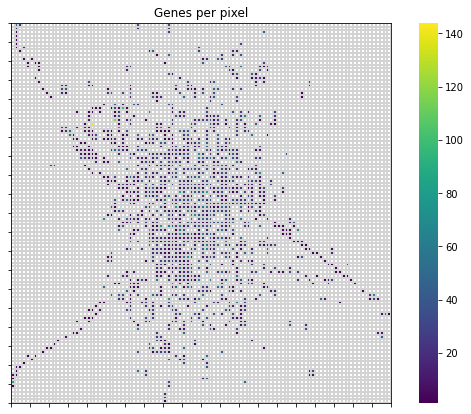

In [8]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Genes per pixel")

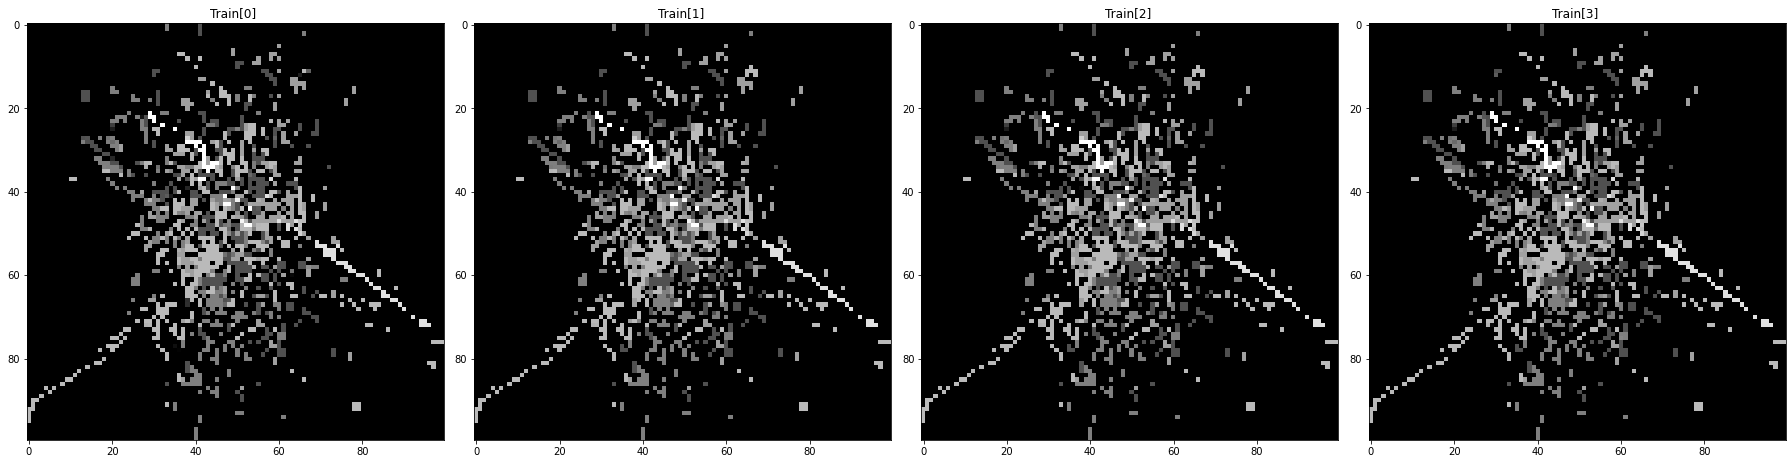

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(25, 7))
for i in range(0,4):
    ax[i].imshow(X_train_img[i])
    ax[i].title.set_text("Train[{}] ".format(i))
plt.tight_layout()

In [10]:
print(it.feature_density_matrix().shape)
print(it.coords().shape)

(100, 100)
(29903, 2)


In [11]:
# np.save("deepinsight_location_npy/feature_density_matrix_[NACGTRYKMSWBDHV]-multiclass=1404.npy",it.feature_density_matrix())
# np.save("deepinsight_location_npy/coords_[NACGTRYKMSWBDHV]-multiclass=1404.npy",it.coords())
np.save("deepinsight_location_npy/feature_density_matrix_[NACGT]-multiclass=1404.npy",it.feature_density_matrix())
np.save("deepinsight_location_npy/coords_[NACGT]-multiclass=1404.npy",it.coords())

In [12]:
# multiclass_nactg multiclass_totalunit
np.save('./np_image_totalunit/multiclass_nactg/label.npy',multi_label)
for idx, image in enumerate(X_train_img):
    if (idx)<10:
        np.save(f"./np_image_totalunit/multiclass_nactg/image_npy/000{idx}.npy", image)
    elif (idx)<100:
        np.save(f"./np_image_totalunit/multiclass_nactg/image_npy/00{idx}.npy", image)
    elif (idx)<1000:
        np.save(f"./np_image_totalunit/multiclass_nactg/image_npy/0{idx}.npy", image)
    else:
        np.save(f"./np_image_totalunit/multiclass_nactg/image_npy/{idx}.npy", image)


In [ ]:
# fig, ax = plt.subplots(1, 4, figsize=(25, 7))
# for i in range(0,4):
#     ax[i].imshow(X_train_img[i], cmap='bone')
#     ax[i].title.set_text("Train[{}] - class '{}'".format(i, ""))
# plt.tight_layout()

In [ ]:
# from PIL import Image

# new_p = Image.fromarray((X_train_img[0]*255).astype(np.uint8))
# if new_p.mode != 'RGB':
#     new_p = new_p.convert('RGB')
# new_p.save("filename.png")

In [ ]:
# fig, ax = plt.subplots(1, 4, figsize=(25, 7))
# for i in range(0,4):
#     ax[i].imshow(X_train_img[i][:,:,0], cmap='bone')
#     ax[i].title.set_text("Train[{}] - class '{}'".format(i, ""))
# plt.tight_layout()

In [ ]:
from PIL import Image
